In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astroquery.gaia import Gaia
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.interpolate import interp1d

%matplotlib inline
# %matplotlib notebook

Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [4]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

Retrieving tables...
Parsing tables...
Done.
public.public.dual
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighbourhood
gaiadr1.gaiadr1.tmass_best_neighbour
gaiadr1.gaiadr1.tmass_neighbourhood
gaiadr1.gaiadr1.ucac4_best_neighbour
gaiadr1.gaiadr1.ucac4_neighbourhood
gaiadr1.gaiadr1.urat1_best_neighbour
gaiadr1.gaiadr1.urat1_neighbourhood
gaiadr1.gaiadr1.cepheid

In [12]:
print("Executing Gaia Query for LCC, UCL and US")

LCC = Gaia.launch_job_async("SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 AS g_mag_abs, gaia.phot_g_mean_mag-tmass.ks_m AS g_min_ks, gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error FROM gaiadr2.gaia_source AS gaia INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6 AND gaia.parallax <= 12 AND gaia.b >= -10 AND gaia.b <= 16 AND gaia.l >= 285 AND gaia.l <= 313 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) > 15 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 55", dump_to_file = False)

UCL = Gaia.launch_job_async("SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 AS g_mag_abs, gaia.phot_g_mean_mag-tmass.ks_m AS g_min_ks, gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error FROM gaiadr2.gaia_source AS gaia INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6.0 AND gaia.parallax <= 12 AND gaia.b >= 5 AND gaia.b <= 31 AND gaia.l >= 313 AND gaia.l <= 337 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) > 12 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 55", dump_to_file = False)

US  = Gaia.launch_job_async("SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 AS g_mag_abs, gaia.phot_g_mean_mag-tmass.ks_m AS g_min_ks, gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error FROM gaiadr2.gaia_source AS gaia INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6.0 AND gaia.parallax <= 12 AND gaia.b >= 7 AND gaia.b <= 32 AND gaia.l >= 337 AND gaia.l <= 360 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 47", dump_to_file = False)

Executing Gaia Query for LCC, UCL and US
Launched query: 'SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 AS g_mag_abs, gaia.phot_g_mean_mag-tmass.ks_m AS g_min_ks, gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error FROM gaiadr2.gaia_source AS gaia INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6 AND gaia.parallax <= 12 AND gaia.b >= -10 AND gaia.b <= 16 AND gaia.l >= 285 AND gaia.l <= 313 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) > 15 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 55'
Retrieving async. results...


Query finished.
Launched query: 'SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 AS g_mag_abs, gaia.phot_g_mean_mag-tmass.ks_m AS g_min_ks, gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error FROM gaiadr2.gaia_source AS gaia INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6.0 AND gaia.parallax <= 12 AND gaia.b >= 5 AND gaia.b <= 31 AND gaia.l >= 313 AND gaia.l <= 337 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) > 12 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 55'
Retrieving async. results...
Query finished.
Launched query: 'SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b, gaia.phot_g_mean_

In [ ]:
#To get just the coordinates to be used in SuperWASP 

print("Executing Gaia Query for LCC, UCL and US")

LCC_coord = Gaia.launch_job_async("SELECT gaia.ra, gaia.dec FROM gaiadr1.gaia_source AS gaia INNER JOIN gaiadr1.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6 AND gaia.parallax <= 12 AND gaia.b >= -10 AND gaia.b <= 16 AND gaia.l >= 285 AND gaia.l <= 313 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) > 15 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 55", dump_to_file = False)

UCL_coord = Gaia.launch_job_async("SELECT gaia.ra, gaia.dec FROM gaiadr1.gaia_source AS gaia INNER JOIN gaiadr1.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6.0 AND gaia.parallax <= 12 AND gaia.b >= 5 AND gaia.b <= 31 AND gaia.l >= 313 AND gaia.l <= 337 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) > 12 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 55", dump_to_file = False)

US_coord  = Gaia.launch_job_async("SELECT gaia.ra, gaia.dec FROM gaiadr1.gaia_source AS gaia INNER JOIN gaiadr1.tmass_best_neighbour AS xmatch ON gaia.source_id = xmatch.source_id INNER JOIN gaiadr1.tmass_original_valid AS tmass ON tmass.tmass_oid = xmatch.tmass_oid WHERE gaia.parallax >= 6.0 AND gaia.parallax <= 12 AND gaia.b >= 7 AND gaia.b <= 32 AND gaia.l >= 337 AND gaia.l <= 360 AND gaia.pmra < 10 AND gaia.pmdec < 30 AND sqrt(power(gaia.pmra,2)+power(gaia.pmdec,2)) < 47", dump_to_file = False)

In [13]:
print("Getting each column for LCC, UCL and US")

LCC_1 = LCC.get_results()
UCL_1 = UCL.get_results()
US_1  = US.get_results()

# LCC_2 = LCC_coord.get_results()
# UCL_2 = UCL_coord.get_results()
# US_2  = US_coord.get_results()

Getting each column for LCC, UCL and US


In [14]:
print("Saving each column in a CSV file for LCC, UCL and US ")

np.savetxt('LCC_DR2.csv', np.c_[LCC_1["source_id"], LCC_1["ra"], LCC_1["ra_error"],\
                                LCC_1["dec"], LCC_1["dec_error"], LCC_1["parallax"],\
                                LCC_1["parallax_error"], LCC_1["l"], LCC_1["b"],\
                                LCC_1["g_mag_abs"], LCC_1["g_min_ks"], LCC_1["pmra"],\
                                LCC_1["pmra_error"], LCC_1["pmdec"], LCC_1["pmdec_error"]\
                               ], delimiter = ',',\
           header = 'source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,l,b,g_mag_abs,g_min_ks,pmra,pmra_error,pmdec,pmdec_error',\
           fmt = ['%i','%.15f','%.15f','%.15f','%.15f',\
                  '%.15f','%.15f','%.15f','%.15f','%.15f',\
                  '%.15f','%.15f','%.15f','%.15f','%.15f'])

np.savetxt('UCL_DR2.csv', np.c_[UCL_1["source_id"], UCL_1["ra"], UCL_1["ra_error"],\
                                UCL_1["dec"], UCL_1["dec_error"], UCL_1["parallax"],\
                                UCL_1["parallax_error"], UCL_1["l"], UCL_1["b"],\
                                UCL_1["g_mag_abs"], UCL_1["g_min_ks"], UCL_1["pmra"],\
                                UCL_1["pmra_error"], UCL_1["pmdec"], UCL_1["pmdec_error"]\
                               ], delimiter = ',',\
           header = 'source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,l,b,g_mag_abs,g_min_ks,pmra,pmra_error,pmdec,pmdec_error',\
           fmt = ['%i','%.15f','%.15f','%.15f','%.15f',\
                  '%.15f','%.15f','%.15f','%.15f','%.15f',\
                  '%.15f','%.15f','%.15f','%.15f','%.15f'])

np.savetxt('US_DR2.csv', np.c_[US_1["source_id"], US_1["ra"], US_1["ra_error"],\
                                US_1["dec"], US_1["dec_error"], US_1["parallax"],\
                                US_1["parallax_error"], US_1["l"], US_1["b"],\
                                US_1["g_mag_abs"], US_1["g_min_ks"], US_1["pmra"],\
                                US_1["pmra_error"], US_1["pmdec"], US_1["pmdec_error"]\
                               ], delimiter = ',',\
           header = 'source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,l,b,g_mag_abs,g_min_ks,pmra,pmra_error,pmdec,pmdec_error',\
           fmt = ['%i','%.15f','%.15f','%.15f','%.15f',\
                  '%.15f','%.15f','%.15f','%.15f','%.15f',\
                  '%.15f','%.15f','%.15f','%.15f','%.15f'])

# np.savetxt('LCC_Coordinates_Original.csv', np.c_[LCC_2["ra"], LCC_2["dec"]], delimiter = ',', fmt = ['%.15f','%.15f'])
# np.savetxt('UCL_Coordinates_Original.csv', np.c_[UCL_2["ra"], UCL_2["dec"]], delimiter = ',', fmt = ['%.15f','%.15f'])
# np.savetxt('US_Coordinates_Original.csv', np.c_[US_2["ra"], US_2["dec"]], delimiter = ',', fmt = ['%.15f','%.15f'])

Saving each column in a CSV file for LCC, UCL and US 


In [387]:
#5Myr Isochrone with extintion
#60Myr Isochrone without extintion 

LCC_WithExt = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/5_Sco-Cen/Isochrones_ToCutData/Isochrone_5Myr_LCC.cmd', format = 'ascii', data_start = 0, fast_reader = True)
UCL_WithExt = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/5_Sco-Cen/Isochrones_ToCutData/Isochrone_5Myr_UCL.cmd', format = 'ascii', data_start = 0, fast_reader = True)
US_WithExt  = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/5_Sco-Cen/Isochrones_ToCutData/Isochrone_5Myr_US.cmd', format = 'ascii', data_start = 0, fast_reader = True)
All_NoExt   = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/5_Sco-Cen/Isochrones_ToCutData/Isochrone_60Myr_NoExt.cmd', format = 'ascii', data_start = 0, fast_reader = True)

#LCC, UCL, US data from the Mamajeck cut'off queries
LCC_5 = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/7_DR2_LightCurves/LCC_DR2.csv', format = 'ascii', data_start = 0, fast_reader = True)
UCL_5 = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/7_DR2_LightCurves/UCL_DR2.csv', format = 'ascii', data_start = 0, fast_reader = True)
US_5  = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/7_DR2_LightCurves/US_DR2.csv', format = 'ascii', data_start = 0, fast_reader = True)

#Using the points after the cut-off
x_1 = np.array(LCC_5["g_min_ks"])
y_1 = np.array(LCC_5["g_mag_abs"])
x_2 = np.array(UCL_5["g_min_ks"])
y_2 = np.array(UCL_5["g_mag_abs"])
x_3 = np.array(US_5["g_min_ks"])
y_3 = np.array(US_5["g_mag_abs"])

#5My isochrone for each field with different Av, depending on the region
Iso_5Myr_x_1 = np.array(LCC_WithExt["col23"] - LCC_WithExt["col17"])
Iso_5Myr_y_1 = np.array(LCC_WithExt["col23"])
Iso_5Myr_x_2 = np.array(UCL_WithExt["col23"] - UCL_WithExt["col17"])
Iso_5Myr_y_2 = np.array(UCL_WithExt["col23"])
Iso_5Myr_x_3 = np.array(US_WithExt["col23"] - US_WithExt["col17"])
Iso_5Myr_y_3 = np.array(US_WithExt["col23"])

#60Myr the same for the three regions, because Av = 0.
Iso_60Myr_x = np.array(All_NoExt["col23"] - All_NoExt["col17"])
Iso_60Myr_y = np.array(All_NoExt["col23"])
Iso_60Myr_x = np.append(Iso_60Myr_x, 0.0)
Iso_60Myr_y = np.append(Iso_60Myr_y, -2.19)

Iso_60Myr_x_1 = np.array(All_NoExt["col23"] - All_NoExt["col17"])
Iso_60Myr_y_1 = np.array(All_NoExt["col23"])
Iso_60Myr_x_1 = np.append(Iso_60Myr_x_1, 0.0)
Iso_60Myr_y_1 = np.append(Iso_60Myr_y_1, -1.46)

#To make the slection more suitable
Iso_5Myr_XY_1  = np.stack(zip(Iso_5Myr_x_1, Iso_5Myr_y_1))
Iso_5Myr_XY_2  = np.stack(zip(Iso_5Myr_x_2, Iso_5Myr_y_2))
Iso_5Myr_XY_3  = np.stack(zip(Iso_5Myr_x_3, Iso_5Myr_y_3))

Iso_60Myr_XY_1 = np.stack(zip(Iso_60Myr_x_1, Iso_60Myr_y_1))
Iso_60Myr_XY_2 = np.stack(zip(Iso_60Myr_x_1, Iso_60Myr_y_1))
Iso_60Myr_XY_3 = np.stack(zip(Iso_60Myr_x, Iso_60Myr_y))

#Selection of the actual path to test the polygon
Iso_5Myr_XY_1  = Iso_5Myr_XY_1[np.where(Iso_5Myr_XY_1[:,0] > -0.5)]
Iso_5Myr_XY_1  = Iso_5Myr_XY_1[np.where(Iso_5Myr_XY_1[:,1] > -1.47)]
Iso_5Myr_XY_1  = Iso_5Myr_XY_1[np.where(Iso_5Myr_XY_1[:,1] < 10.0)]

Iso_60Myr_XY_1 = Iso_60Myr_XY_1[np.where(Iso_60Myr_XY_1[:,0] > -0.6)]
Iso_60Myr_XY_1 = Iso_60Myr_XY_1[np.where(Iso_60Myr_XY_1[:,1] > -1.47)]
Iso_60Myr_XY_1 = Iso_60Myr_XY_1[np.where(Iso_60Myr_XY_1[:,1] < 10.0)]

Iso_5Myr_XY_2  = Iso_5Myr_XY_2[np.where(Iso_5Myr_XY_2[:,0] > -0.5)]
Iso_5Myr_XY_2  = Iso_5Myr_XY_2[np.where(Iso_5Myr_XY_2[:,1] > -1.47)]
Iso_5Myr_XY_2  = Iso_5Myr_XY_2[np.where(Iso_5Myr_XY_2[:,1] < 10.0)]

Iso_60Myr_XY_2 = Iso_60Myr_XY_2[np.where(Iso_60Myr_XY_2[:,0] > -0.6)]
Iso_60Myr_XY_2 = Iso_60Myr_XY_2[np.where(Iso_60Myr_XY_2[:,1] > -1.47)]
Iso_60Myr_XY_2 = Iso_60Myr_XY_2[np.where(Iso_60Myr_XY_2[:,1] < 10.0)]

Iso_5Myr_XY_3  = Iso_5Myr_XY_3[np.where(Iso_5Myr_XY_3[:,0] > 0.0)]
Iso_5Myr_XY_3  = Iso_5Myr_XY_3[np.where(Iso_5Myr_XY_3[:,1] > -2.2)]
Iso_5Myr_XY_3  = Iso_5Myr_XY_3[np.where(Iso_5Myr_XY_3[:,1] < 10.0)]

Iso_60Myr_XY_3 = Iso_60Myr_XY_3[np.where(Iso_60Myr_XY_3[:,0] > -0.6)]
Iso_60Myr_XY_3 = Iso_60Myr_XY_3[np.where(Iso_60Myr_XY_3[:,1] > -2.2)]
Iso_60Myr_XY_3 = Iso_60Myr_XY_3[np.where(Iso_60Myr_XY_3[:,1] < 10.0)]


# plt.figure(figsize  = (5,8))
# plt.plot(Iso_5Myr_XY_3[:,0], Iso_5Myr_XY_3[:,1], '.')
# plt.plot(Iso_60Myr_XY[:,0], Iso_60Myr_XY[:,1], '.')
# plt.ylim(-3,11)
# plt.xlim(-3,5.5)

#Using the polygon algortihm 
Points_1       = np.column_stack((x_1,y_1))
Points_iso5_1  = np.column_stack((Iso_5Myr_XY_1[:,0],Iso_5Myr_XY_1[:,1]))
Points_iso60_1 = np.column_stack((Iso_60Myr_XY_1[:,0],Iso_60Myr_XY_1[:,1]))
Points_iso60_1 = np.sort(Points_iso60_1[::-1])
Verts_iso_1    = np.concatenate((Points_iso60_1,Points_iso5_1))
Code_1 = []
for i in range(len(Verts_iso_1)):
    if i == 0:
        Code_1.append(1)
    if i != 0 and i != len(Verts_iso_1) - 1:
        Code_1.append(2)
    if i == len(Verts_iso_1) - 1:
        Code_1.append(0)
path_1         = Path(Verts_iso_1.tolist(), Code_1)

Points_2       = np.column_stack((x_2,y_2))
Points_iso5_2  = np.column_stack((Iso_5Myr_XY_2[:,0],Iso_5Myr_XY_2[:,1]))
Points_iso60_2 = np.column_stack((Iso_60Myr_XY_2[:,0],Iso_60Myr_XY_2[:,1]))
Points_iso60_2 = np.sort(Points_iso60_2[::-1])
Verts_iso_2    = np.concatenate((Points_iso60_2,Points_iso5_2))
Code_2 = []
for i in range(len(Verts_iso_2)):
    if i == 0:
        Code_2.append(1)
    if i != 0 and i != len(Verts_iso_2) - 1:
        Code_2.append(2)
    if i == len(Verts_iso_2) - 1:
        Code_2.append(0) 
path_2         = Path(Verts_iso_2.tolist(), Code_2)

Points_3       = np.column_stack((x_3,y_3))
Points_iso5_3  = np.column_stack((Iso_5Myr_XY_3[:,0],Iso_5Myr_XY_3[:,1]))
Points_iso60_3 = np.column_stack((Iso_60Myr_XY_3[:,0],Iso_60Myr_XY_3[:,1]))
Points_iso60_3 = np.sort(Points_iso60_3[::-1])
Verts_iso_3    = np.concatenate((Points_iso60_3,Points_iso5_3))
Code_3 = []
for i in range(len(Verts_iso_3)):
    if i == 0:
        Code_3.append(1)
    if i != 0 and i != len(Verts_iso_3) - 1:
        Code_3.append(2)
    if i == len(Verts_iso_3) - 1:
        Code_3.append(0)        
path_3         = Path(Verts_iso_3.tolist(), Code_3)
# fig, ax = plt.subplots(figsize = (5,8))
# patch = PathPatch(path_3, facecolor = 'r', alpha = 0.5)
# ax.add_patch(patch)
# ax.set_ylim(-3,11)
# ax.set_xlim(-3,5.5)
# ax.axvline(0)

Sample_1 = []
RA_1     = []
DEC_1    = []
for i in range(len(Points_1)):
    if path_1.contains_point(Points_1[i].tolist()) == True:
        Sample_1.append(Points_1[i])
        RA_1.append(LCC_5["ra"][i])
        DEC_1.append(LCC_5["dec"][i])
Sample_1 = np.array(Sample_1)

Sample_2 = []
RA_2     = []
DEC_2    = []
for i in range(len(Points_2)):
    if path_2.contains_point(Points_2[i].tolist()) == True:
        Sample_2.append(Points_2[i]) 
        RA_2.append(UCL_5["ra"][i])
        DEC_2.append(UCL_5["dec"][i])
Sample_2 = np.array(Sample_2)
     
Sample_3 = []
RA_3     = []
DEC_3    = []
for i in range(len(Points_3)):
    if path_3.contains_point(Points_3[i].tolist()) == True:
        Sample_3.append(Points_3[i]) 
        RA_3.append(US_5["ra"][i])
        DEC_3.append(US_5["dec"][i])
Sample_3 = np.array(Sample_3)

Data: LCC UCL US after cut
3572 3031 3747
Data: LCC UCL US Original
15074 9658 14580


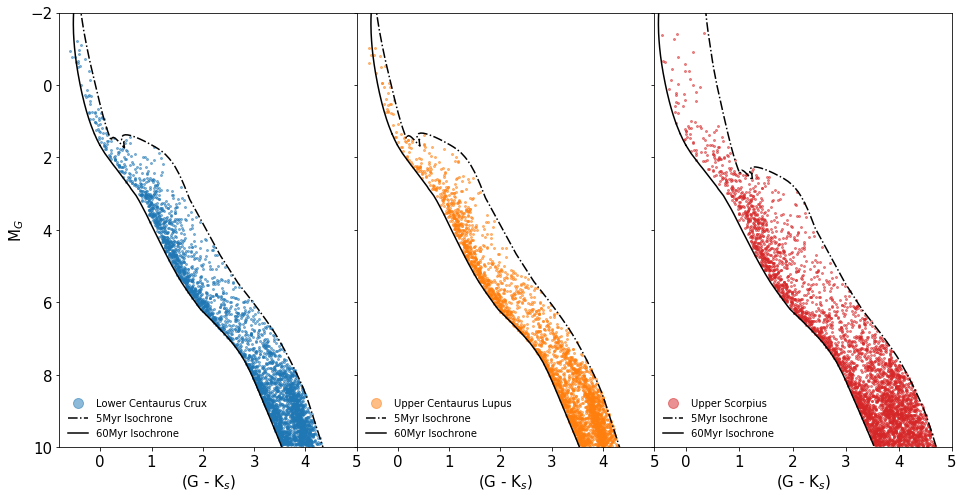

In [389]:
#Plotting
fig, ((axA, axB, axC)) = plt.subplots(figsize = (16,8), nrows = 1, ncols = 3, sharey = True)

axA.plot(Sample_1[:,0], Sample_1[:,1], 'o', c = 'C0', markersize = 2, alpha = 0.5)
# axA.plot(Iso_5Myr_XY_1[:,0], Iso_5Myr_XY_1[:,1], '-.', color = 'k')
# axA.plot(Iso_60Myr_XY_1[:,0], Iso_60Myr_XY_1[:,1], color = 'k')
axA.plot(LCC_WithExt["col23"] - LCC_WithExt["col17"], LCC_WithExt["col23"], '-.', color = 'k')
axA.plot(All_NoExt["col23"] - All_NoExt["col17"], All_NoExt["col23"], color = 'k')
axA.legend(['Lower Centaurus Crux', '5Myr Isochrone', '60Myr Isochrone'],\
           frameon = False, prop = {'size': 10}, markerscale = 5, loc = 'lower left')
axA.set_ylim(10,-2.0)
axA.set_xlim(-0.8,5.0)
axA.set_ylabel(r"M$_G$", size = 15)
axA.set_xlabel(r"(G - K$_s$)", size = 15)
axA.tick_params(axis = 'both', which = 'major', labelsize = 15)

axB.plot(Sample_2[:,0],Sample_2[:,1], 'o', c = 'C1', markersize = 2, alpha = 0.5)
# axB.plot(Iso_5Myr_XY_2[:,0], Iso_5Myr_XY_2[:,1], '-.', color = 'k')
# axB.plot(Iso_60Myr_XY_2[:,0], Iso_60Myr_XY_2[:,1], color = 'k')
axB.plot(UCL_WithExt["col23"] - UCL_WithExt["col17"], UCL_WithExt["col23"], '-.', color = 'k')
axB.plot(All_NoExt["col23"] - All_NoExt["col17"], All_NoExt["col23"], color = 'k')
axB.legend(['Upper Centaurus Lupus', '5Myr Isochrone', '60Myr Isochrone'],\
           frameon = False, prop = {'size': 10}, markerscale = 5, loc = 'lower left')
axB.set_ylim(10,-2.0)
axB.set_xlim(-0.8,5.0)
axB.set_xlabel(r"(G - K$_s$)", size = 15)
axB.tick_params(axis = 'both', which = 'major', labelsize = 15)

axC.plot(Sample_3[:,0],Sample_3[:,1], 'o', c = 'C3', markersize = 2, alpha = 0.5)
# axC.plot(Iso_5Myr_XY_3[:,0], Iso_5Myr_XY_3[:,1], '-.', color = 'k')
# axC.plot(Iso_60Myr_XY_3[:,0], Iso_60Myr_XY_3[:,1], color = 'k')
axC.plot(Iso_5Myr_XY_3[:,0], Iso_5Myr_XY_3[:,1], '-.', color = 'k')
axC.plot(Iso_60Myr_XY[:,0], Iso_60Myr_XY[:,1], color = 'k')
axC.legend(['Upper Scorpius', '5Myr Isochrone', '60Myr Isochrone'], \
           frameon = False, prop = {'size': 10}, markerscale = 5, loc = 'lower left')
axC.set_ylim(10,-2.0)
axC.set_xlim(-0.60,5.0)
axC.set_xlabel(r"(G - K$_s$)", size = 15)
axC.tick_params(axis = 'both', which = 'major', labelsize = 15)

fig.subplots_adjust(wspace = 0)

plt.savefig("final_Sample_SCOCEN.png", dpi = 300, bbox_inches = 'tight')        

print("Data: LCC UCL US after cut")
print(len(Sample_1), len(Sample_2), len(Sample_3))
print("Data: LCC UCL US Original")
print(len(LCC_5), len(UCL_5), len(US_5))

#Writing out RA and DEC for the final selection after Mamajek and Isochrones
np.savetxt('LCC_Coorndinates.csv', np.c_[RA_1, DEC_1], fmt = ['%.15f','%.15f'], delimiter = ',')
np.savetxt('UCL_Coorndinates.csv', np.c_[RA_2, DEC_2], fmt = ['%.15f','%.15f'], delimiter = ',')
np.savetxt('US_Coorndinates.csv', np.c_[RA_3, DEC_3], fmt = ['%.15f','%.15f'], delimiter = ',')

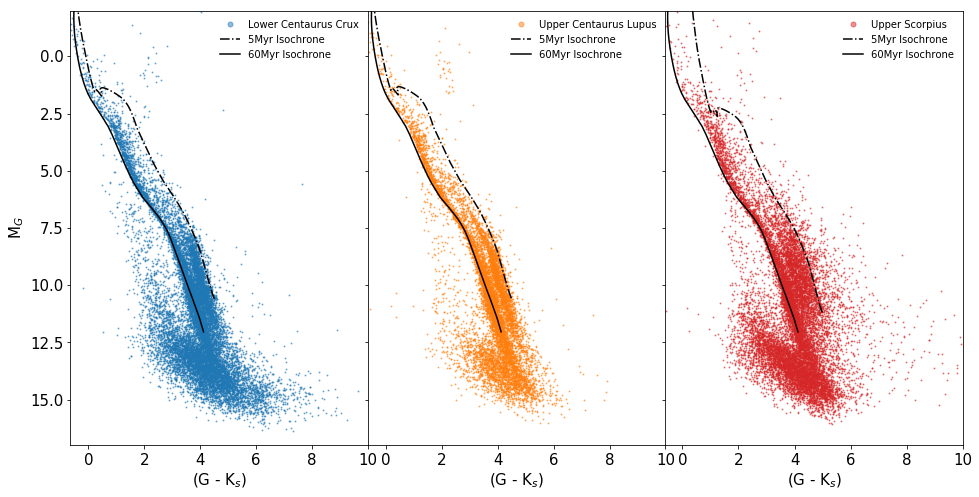

In [391]:
fig, ((axA, axB, axC)) = plt.subplots(figsize = (16,8), nrows = 1, ncols = 3, sharey = True)

axA.plot(LCC_5['g_min_ks'], LCC_5['g_mag_abs'], 'o', c = 'C0', markersize = 1, alpha = 0.5)
# axA.plot(Iso_5Myr_XY_1[:,0], Iso_5Myr_XY_1[:,1], '-.', color = 'k')
# axA.plot(Iso_60Myr_XY[:,0], Iso_60Myr_XY[:,1], color = 'k')
axA.plot(LCC_WithExt["col23"] - LCC_WithExt["col17"], LCC_WithExt["col23"], '-.', color = 'k')
axA.plot(All_NoExt["col23"] - All_NoExt["col17"], All_NoExt["col23"], color = 'k')
axA.legend(['Lower Centaurus Crux', '5Myr Isochrone', '60Myr Isochrone'],\
           frameon = False, prop = {'size': 10}, markerscale = 5, loc = 'upper right')
axA.set_ylim(17,-2)
axA.set_xlim(-0.65,10)
# axA.set_ylim(8,-1)
# axA.set_xlim(-0.5,3.5)
# axA.axhline(-1.5, c = 'C4')
# axA.axhline(10, c = 'C4')
axA.set_ylabel(r"M$_G$", size = 15)
axA.set_xlabel(r"(G - K$_s$)", size = 15)
axA.tick_params(axis = 'both', which = 'major', labelsize = 15)

axB.plot(UCL_5['g_min_ks'], UCL_5['g_mag_abs'], 'o', c = 'C1', markersize = 1, alpha = 0.5)
# axB.plot(Iso_5Myr_XY_2[:,0], Iso_5Myr_XY_2[:,1], '-.', color = 'k')
# axB.plot(Iso_60Myr_XY[:,0], Iso_60Myr_XY[:,1], color = 'k')
axB.plot(UCL_WithExt["col23"] - UCL_WithExt["col17"], UCL_WithExt["col23"], '-.', color = 'k')
axB.plot(All_NoExt["col23"] - All_NoExt["col17"], All_NoExt["col23"], color = 'k')
axB.legend(['Upper Centaurus Lupus', '5Myr Isochrone', '60Myr Isochrone'],\
           frameon = False, prop = {'size': 10}, markerscale = 5, loc = 'upper right')
axB.set_ylim(17,-2)
axB.set_xlim(-0.65,10)
# axB.set_ylim(8,-1)
# axB.set_xlim(-0.5,3.5)
# axB.axhline(-2.5, c = 'C4')
# axB.axhline(10, c = 'C4')
axB.set_xlabel(r"(G - K$_s$)", size = 15)
axB.tick_params(axis = 'both', which = 'major', labelsize = 15)

axC.plot(US_5['g_min_ks'], US_5['g_mag_abs'], 'o', c = 'C3', markersize = 1, alpha = 0.5)
# axC.plot(Iso_5Myr_XY_3[:,0], Iso_5Myr_XY_3[:,1], '-.', color = 'k')
# axC.plot(Iso_60Myr_XY[:,0], Iso_60Myr_XY[:,1], color = 'k')
axC.plot(US_WithExt["col23"] - US_WithExt["col17"], US_WithExt["col23"], '-.', color = 'k')
axC.plot(All_NoExt["col23"] - All_NoExt["col17"], All_NoExt["col23"], color = 'k')
axC.legend(['Upper Scorpius', '5Myr Isochrone', '60Myr Isochrone'], \
           frameon = False, prop = {'size': 10}, markerscale = 5, loc = 'upper right')
axC.set_ylim(17,-2)
axC.set_xlim(-0.60, 10)
# axC.set_ylim(8,-1)
# axC.set_xlim(-0.5,3.5)
# axC.axhline(1, c = 'C4')
# axC.axhline(10, c = 'C4')
# axC.axhline(-1, c = 'C4')
axC.set_xlabel(r"(G - K$_s$)", size = 15)
axC.tick_params(axis = 'both', which = 'major', labelsize = 15)

fig.subplots_adjust(wspace = 0)

# plt.savefig("DR2_Sample_NoSelection_2.png", dpi = 300, bbox_inches = 'tight')